In [29]:
from classy import Class
import numpy as np
import matplotlib.pyplot as pl

from scipy.special import spherical_jn
from scipy.integrate import simpson

Class outputs $T_X(k)$, the tranfer function for each species $X$. The transfer function is defined according to the equation:

$$
\delta(k,z) = T(k,z) * \Phi_{\text{prim}}(k)
$$


To go from the Fourier-space transfer functions to real-space density flucutations, we use the spherical Bessel transform.

$$
\delta(r, z) = \int_0^{\infin} k^2 T(k, z) j_0(kr) dk
$$

In [27]:
def bessel_transform(tk, k, r_vals):
    """Inverse Hankel transform of T(k) to δ(r)"""
    delta = np.zeros(len(r_vals), dtype=float)
    for i in range(len(r_vals)):
        integrand = k**2 * tk * spherical_jn(0, k * r_vals[i])
        delta[i] = simpson(y=integrand, x=k)
    return delta

In [39]:
# Setup CLASS
cosmo = Class()
params = {
    #key parameters for getting transfer functions at high redshift
    'output': 'mTk',
    'z_pk': '3000',
    'matter_source_in_current_gauge' : 'yes',

    #parameters for specifying cosmology
    'h':0.67556,
    'omega_b':0.02238280,   
    'omega_cdm':0.1201075,  
    'A_s':2.215e-9,
    'n_s':0.9619,
    'tau_reio':0.05430842,
    'YHe':'BBN',
    #'gauge': 'newtonian',
}
cosmo.set(params)
cosmo.compute()


In [13]:
cosmo.get_transfer(1000)['d_g'].shape

(114,)

In [ ]:
# Get transfer function data
zlist = [1000, 500, 200, 100, 50, 10, 0]
h = 0.67556
rs = np.linspace(0,200,500) * h
ks = 1/rs
deltas = {}

for z in zlist:
    tf = cosmo.get_transfer(z)
    ks = tf['k (h/Mpc)']
    deltas[z] = {
        'r': rs,
        'cdm': bessel_transform(tf['d_cdm'],ks,rs),
        'baryons': bessel_transform(tf['d_b'],ks,rs),
        'photons': bessel_transform(tf['d_g'],ks,rs),
        'neutrinos': bessel_transform(tf.get('d_ur', tf.get('d_ncdm[0]', np.zeros_like(tf['d_cdm']))),ks,rs),
        'total': bessel_transform(tf['d_tot'],ks,rs),
    }

interpolate the T(k) values onto the k grid we want (cooresponding to the desired r grid) then do the transform

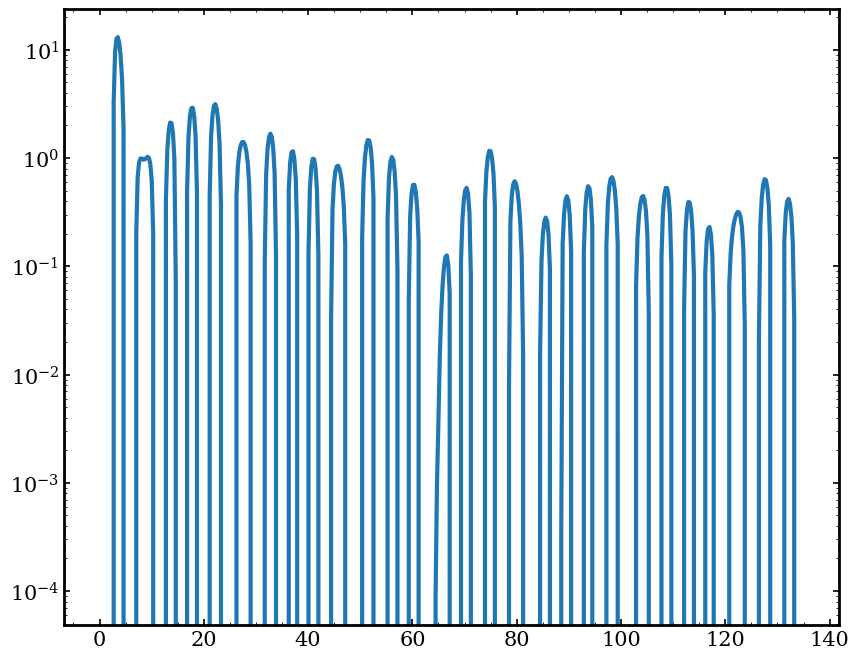

In [46]:
pl.semilogy(rs, deltas[1000]['cdm'])
#pl.xlim(0,200)
pl.show()


In [31]:
deltas[1000]['baryons']

array([-4.68394222e-06, -3.48733355e-06, -1.05213399e-05,  1.46057076e-05,
       -3.51927477e-06, -2.48018144e-05,  6.31898610e-07, -1.10814928e-05,
       -4.09286612e-05,  6.76757522e-05, -3.39500452e-05, -9.73574690e-05,
       -7.69399189e-05, -4.79851692e-05, -1.95954297e-04, -1.31469663e-04,
        7.97856685e-05, -1.57368184e-05, -1.78352748e-04,  5.90445396e-04,
        2.14876552e-04,  7.54612215e-04,  1.00874768e-03, -8.40682227e-04,
        5.45228990e-04,  1.77649060e-03,  4.95510666e-04, -9.30809899e-04,
       -8.43784903e-04, -1.62554473e-04, -3.44502015e-06,  1.06681197e-02,
        6.97716553e-03,  1.07692713e-02, -4.26240655e-03, -1.77894862e-02,
       -6.18291821e-03,  1.14640167e-02,  4.85160986e-03, -1.20075950e-02,
       -1.14793391e-02, -3.54212517e-03,  3.19045538e-03,  6.40422079e-03,
        7.06066431e-03,  6.75651120e-03,  6.52015175e-03,  6.58370726e-03,
        6.60672376e-03,  6.01685738e-03,  4.30092647e-03,  1.18680847e-03,
       -3.28556750e-03, -